## Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Get The Data (MNIST Data)

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the input images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(f"The Size Of The Train Data Before Augmentation : {len(train_images)}")

The Size Of The Train Data Before Augmentation : 60000


## Data Augmentation

In [4]:
# Create an ImageDataGenerator instance with desired augmentations
Augment = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on the training data
Augment.fit(train_images)

# Create augmented data generator
AugmentedData = Augment.flow(train_images, train_labels, batch_size=60000)

# Generate augmented images
AugmentedBatch = AugmentedData.next()
AugmentedImages, AugmentedLabels = AugmentedBatch[0][:], AugmentedBatch[1][:]

In [5]:
# Check the shape of the augmented data
print("Shape of AugmentedImages:", AugmentedImages.shape)
print("Shape of AugmentedLabels:", AugmentedLabels.shape)

Shape of AugmentedImages: (60000, 28, 28, 1)
Shape of AugmentedLabels: (60000, 10)


In [6]:
# Concatenate original and augmented data
train_images = np.concatenate([train_images, AugmentedImages])
train_labels = np.concatenate([train_labels, AugmentedLabels])

In [7]:
# Check the shape of the augmented data
print("Shape of AugmentedImages:", train_images.shape)
print("Shape of AugmentedLabels:", train_labels.shape)

Shape of AugmentedImages: (120000, 28, 28, 1)
Shape of AugmentedLabels: (120000, 10)


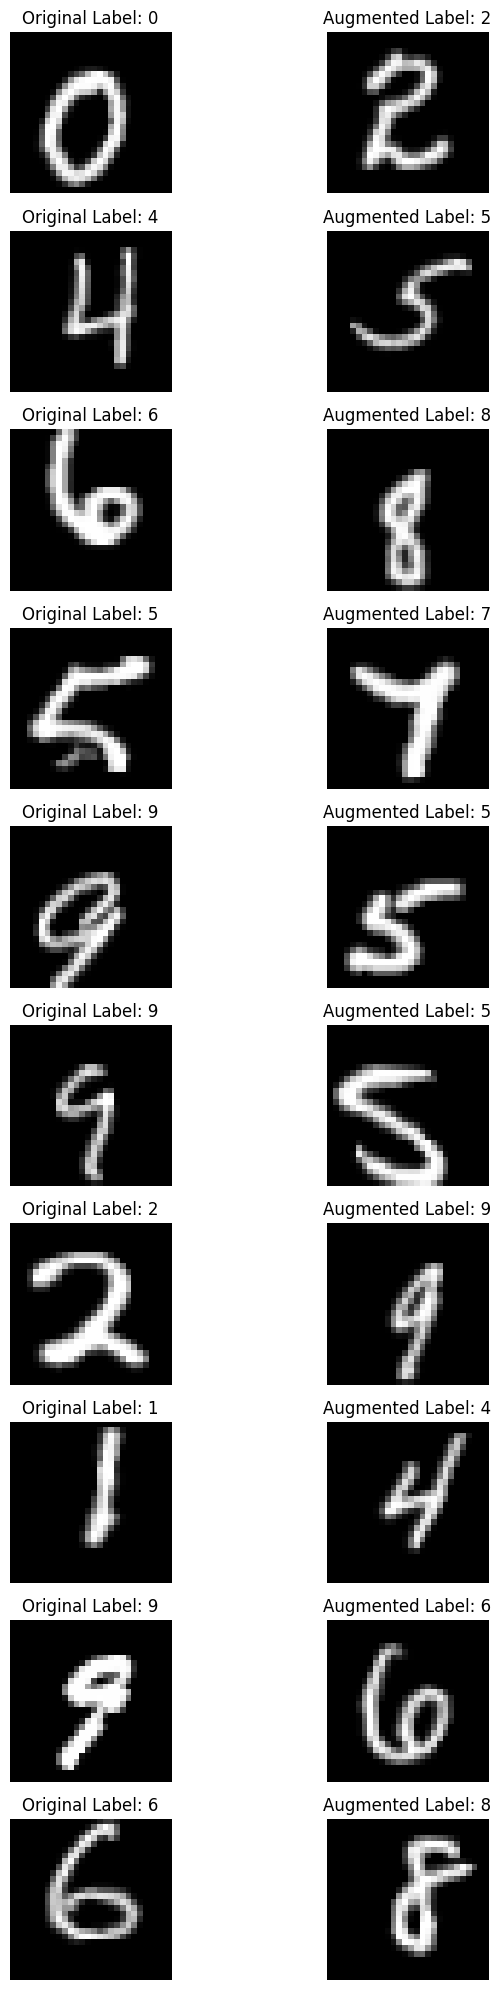

In [8]:
# Choose 10 random indices for the images
indices = np.random.choice(len(train_images), size=10, replace=False)

# Plot original and augmented images with labels
fig, axes = plt.subplots(10, 2, figsize=(8, 20))

for i, idx in enumerate(indices):
    # Original image
    axes[i, 0].imshow(train_images[idx, :, :, 0], cmap='gray')
    axes[i, 0].set_title(f'Original Label: {np.argmax(train_labels[idx])}')

    axes[i, 1].imshow(AugmentedImages[i, :, :, 0], cmap='gray')
    axes[i, 1].set_title(f'Augmented Label: {np.argmax(AugmentedLabels[i])}')

    # Remove axis labels
    for ax in axes[i]:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [9]:
train_images, predict_images, train_labels, predict_labels = train_test_split(
    train_images, train_labels, test_size=0.0001,shuffle=True)

In [10]:
print(f"The Size Of The Train   Data : {len(train_images)}")
print(f"The Size Of The Test    Data : {len(test_images)}")
print(f"The Size Of The Predict Data : {len(predict_images)}")

The Size Of The Train   Data : 119988
The Size Of The Test    Data : 10000
The Size Of The Predict Data : 12


## Create A Model (CNN Model)

In [56]:
model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (2, 2), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),

    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Another Form

In [ ]:
model = Sequential()

# Convolutional Layers with Dropout
model.add(layers.Conv2D(64, (4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(4, 4), strides=(1, 1), padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same'))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# Flatten Layer
model.add(layers.Flatten())

# Dense Layers with Dropout
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Some Details

In [57]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 128)       32896     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 4608)              0         
                                                                 
 dense_52 (Dense)            (None, 128)             

## Train The Model

In [58]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 9s 8ms/step - loss: 0.2074 - accuracy: 0.9348 - val_loss: 0.0822 - val_accuracy: 0.9757
Epoch 2/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0654 - val_accuracy: 0.9804
Epoch 3/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.0567 - val_accuracy: 0.9837
Epoch 4/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0591 - val_accuracy: 0.9822
Epoch 5/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0450 - val_accuracy: 0.9873


In [59]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {round((test_acc*100),2)}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.0317 - accuracy: 0.9905
Test accuracy: 99.05%


In [ ]:
# # To save it
model.save('Model_DL_98_9.h5')

In [ ]:
# # To load it
from keras.models import load_model
loaded_model = load_model('Model_DL_99_1.h5')

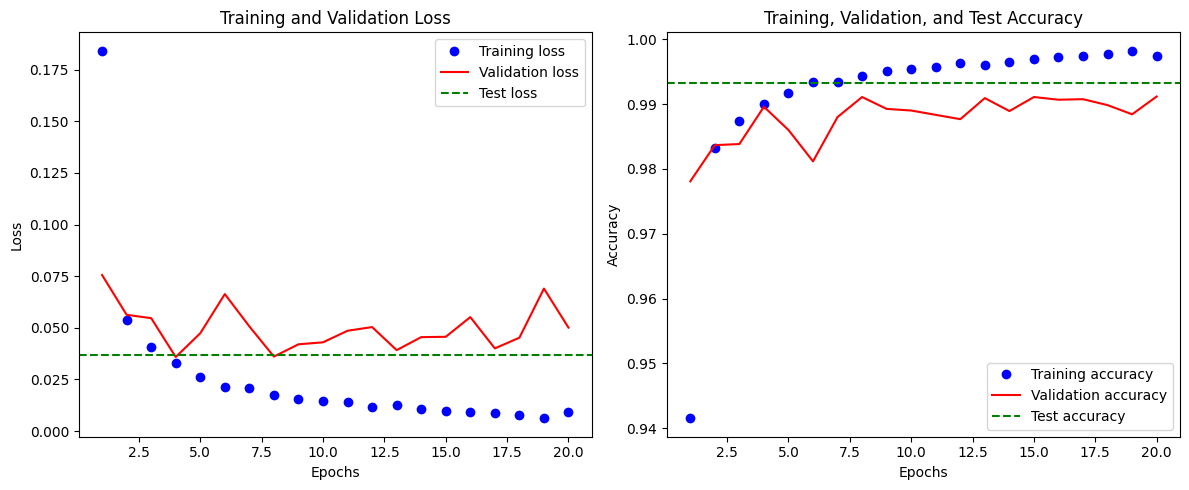

In [15]:
train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc    = history.history['val_accuracy']
val_loss   = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Visualize The Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.axhline(y=test_loss, color='g', linestyle='--', label='Test loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Visualize The Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.axhline(y=test_acc, color='g', linestyle='--', label='Test accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Predict Some Data

In [ ]:
def predict_image(model, image):
    # Preprocess the image (reshape and normalize)
    input_image = np.reshape(image, (1, 28, 28, 1)).astype('float32') / 255.0

    predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)), axis=1)
    return predicted_label

1/1 [==============================] - 0s 40ms/step


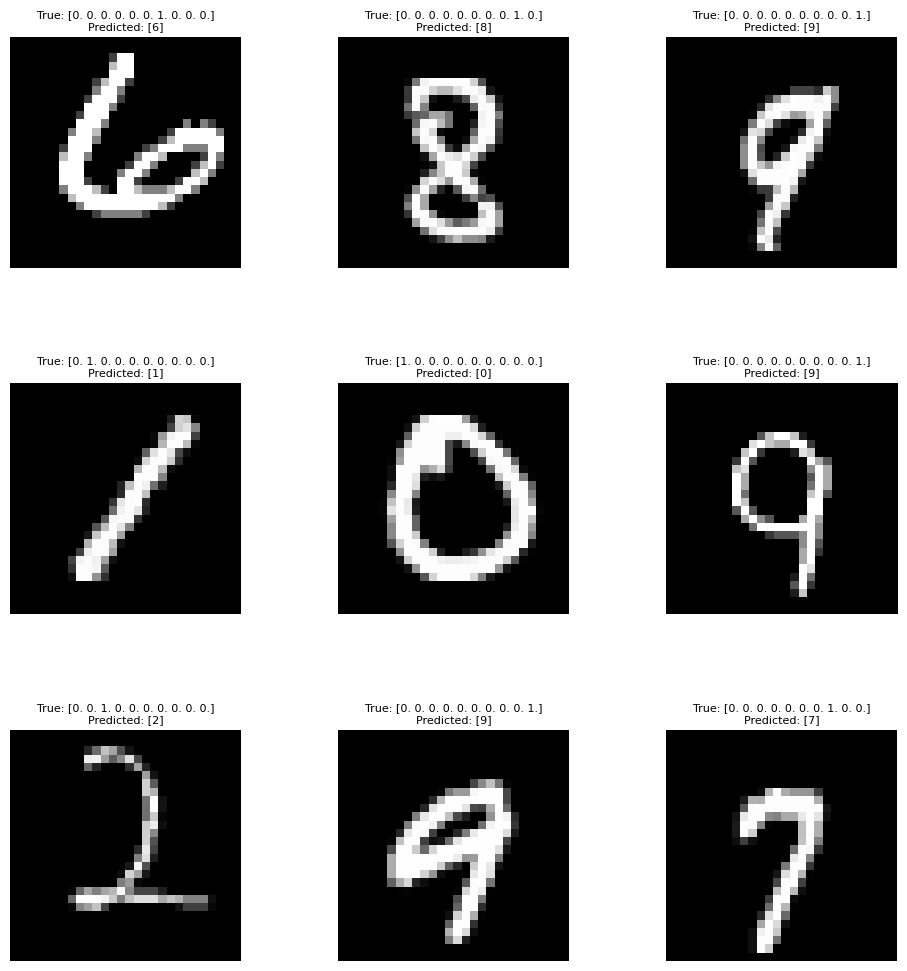

In [ ]:
sample_indices = np.random.choice(len(test_images), 9, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axes.flatten()):
    if i < 9:
        sample_index = sample_indices[i]
        sample_image = test_images[sample_index]
        true_label = test_labels[sample_index]

        # Predict the label using your function
        predicted_label = predict_image(model, sample_image)

        ax.imshow(np.squeeze(sample_image), cmap='gray')
        ax.axis('off')

        title = f'True: {true_label}\nPredicted: {predicted_label}'
        ax.set_title(title, fontsize=8)

plt.show()

## Predict Out Data

In [ ]:
import cv2

def load_and_preprocess_image(image_path):

    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to the MNIST standard size (28x28)
    image = cv2.resize(image, (28, 28))

    _, image = cv2.threshold(image, 155, 255, cv2.THRESH_BINARY_INV)

    # Normalize the pixel values to be between 0 and 1
    img_array = image.astype('float32') / 255.0

    # Reshape the image to (28, 28, 1) for compatibility with the model
    img_array = np.expand_dims(img_array, axis=-1)

    # Reshape to (1, 28, 28, 1) for compatibility with Conv2D input shape
    img_array = np.expand_dims(img_array, axis=0)

    return img_array


In [ ]:
def predict_image1(model, image):
    predicted_label = np.argmax(model.predict(image), axis=1)
    return predicted_label

In [ ]:
external_image_path = './5.jpeg'  


external_image = load_and_preprocess_image(external_image_path)

predicted_label = predict_image1(model, external_image)

1/1 [==============================] - 0s 33ms/step


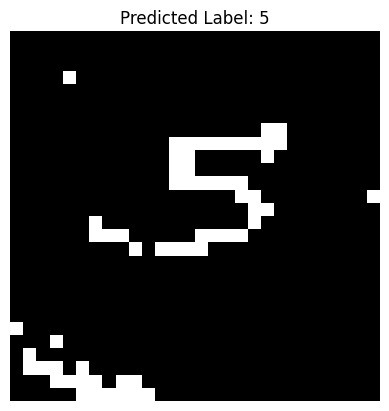

In [ ]:
plt.imshow(np.squeeze(external_image), cmap='gray')
plt.axis('off')
title = f'Predicted Label: {predicted_label[0]}'
plt.title(title, fontsize=12)
plt.show()

****الحمد لله حمداً طيباً كثيراً****